# Graphics Showing the Historical Development of Agent-Based Modeling. 
## Loading Necessary Packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import opinionated
import matplotlib.pyplot as plt
plt.style.use("opinionated_rc")
import colormaps


Now downloading: Roboto Condensed
Added new font as Roboto Condensed Light
Added new font as Roboto Condensed
Added new font as Roboto Condensed
Added new font as Roboto Condensed Black
Now downloading: Montserrat
Added new font as Montserrat Thin Light
Added new font as Montserrat Thin
Added new font as Montserrat Thin
Added new font as Montserrat Thin Black
Now downloading: Source Code Pro
Added new font as Source Code Pro ExtraLight Light
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight Black
Now downloading: Fira Sans
Added new font as Fira Sans Light
Added new font as Fira Sans
Added new font as Fira Sans
Added new font as Fira Sans Black
Now downloading: Fira Sans Condensed
Added new font as Fira Sans Condensed Light
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed Black
Now downloading: IBM Plex Sans
Added new font as IBM Plex San

## Loading data. 
Data was retrieved via OpenAlex using the search query "agent-based model" or "agent-based simulation" on the full texts and the titles and abstracts. Data was retrieved 6th of March 2025 via the interface of [OpenAlex mapper](https://huggingface.co/spaces/m7n/openalex_mapper).

In [47]:
data = pd.read_csv("data/title_and_abstract_search_agent_based_model_OR_agent_based_simulation__20250306_004117.csv")


Inspecting the dataset:

In [48]:
display(data)

,title,abstract,doi,publication_year,x,y,id,primary_topic,parsed_field,referenced_works,approximate_publication_year
0,Agent-based modeling: Methods and techniques f...,Agent-based modeling is a powerful simulation ...,https://doi.org/10.1073/pnas.082080899,2002,8.020056,0.829608,https://openalex.org/W2150704630,"{'id': 'https://openalex.org/T11500', 'display...",Ocean Engineering,"https://openalex.org/W1501219137, https://open...",2011.0
1,The Complexity of Cooperation: Agent-Based Mod...,A collection of seven essays that serves as an...,https://doi.org/10.2307/20048800,1998,10.129814,2.535163,https://openalex.org/W1501219137,"{'id': 'https://openalex.org/T11252', 'display...",Sociology and Political Science,"https://openalex.org/W103295167, https://opena...",2010.7
2,A standard protocol for describing individual-...,,https://doi.org/10.1016/j.ecolmodel.2006.04.023,2006,7.666853,1.016876,https://openalex.org/W2145408484,"{'id': 'https://openalex.org/T10226', 'display...",Global and Planetary Change,"https://openalex.org/W1483113211, https://open...",2014.8
3,Tutorial on agent-based modelling and simulation,Agent-based modelling and simulation (ABMS) is...,https://doi.org/10.1057/jos.2010.3,2010,7.175040,0.617616,https://openalex.org/W3011439212,"{'id': 'https://openalex.org/T12592', 'display...",Statistical and Nonlinear Physics,"https://openalex.org/W1482193576, https://open...",2016.6
4,The Complexity of Cooperation: Agent-Based Mod...,Robert Axelrod is widely known for his groundb...,https://doi.org/10.1515/9781400822300,1997,10.543892,1.138326,https://openalex.org/W2483014731,"{'id': 'https://openalex.org/T10785', 'display...",Economics and Econometrics,NaN,2015.5
...,...,...,...,...,...,...,...,...,...,...,...
64322,Análise do efeito do investimento inicial no d...,O dilema do prisioneiro é geralmente visto com...,https://doi.org/10.11606/t.47.2016.tde-0203201...,2016,10.701656,0.891873,https://openalex.org/W2295814159,"{'id': 'https://openalex.org/T10646', 'display...",Safety Research,"https://openalex.org/W1265389026, https://open...",2014.6
64323,農業水利サービスの定量的評価と需要主導型提供手法の開発,愛知用水および印旛沼に研究対象地区を設定し、農業用水の量的質的動態の精密な観測と動的モデルの...,https://doi.org/10.52926/jpmjrx11d1,2011,11.189225,3.108131,https://openalex.org/W4229928299,NaN,NaN,"https://openalex.org/W1974544719, https://open...",2019.1
64324,การประยุกต์ใช้เซลลูลาร์ออโตมาตาศึกษาการเปลี่ยน...,การพัฒนาโครงสร้างพื้นฐานและการเจริญเติบโตทางเศ...,https://doi.org/10.58837/chula.the.2017.743,2017,7.683230,0.659075,https://openalex.org/W4386740464,NaN,NaN,"https://openalex.org/W1543691249, https://open...",2014.0
64325,แนวทางการจัดการการใช้พื้นที่ด้วยการบูรณาการข้อ...,อำเภอสทิงพระ จังหวัดสงขลา เป็นพื้นที่ที่มีการใ...,https://doi.org/10.58837/chula.the.2016.843,2016,11.597435,3.067350,https://openalex.org/W4386639671,NaN,NaN,"https://openalex.org/W1263192620, https://open...",2018.2


Plotting the whole temporal distribution of the dataset, we decide to restrict to the years after 1999, summarizing all of the years before.

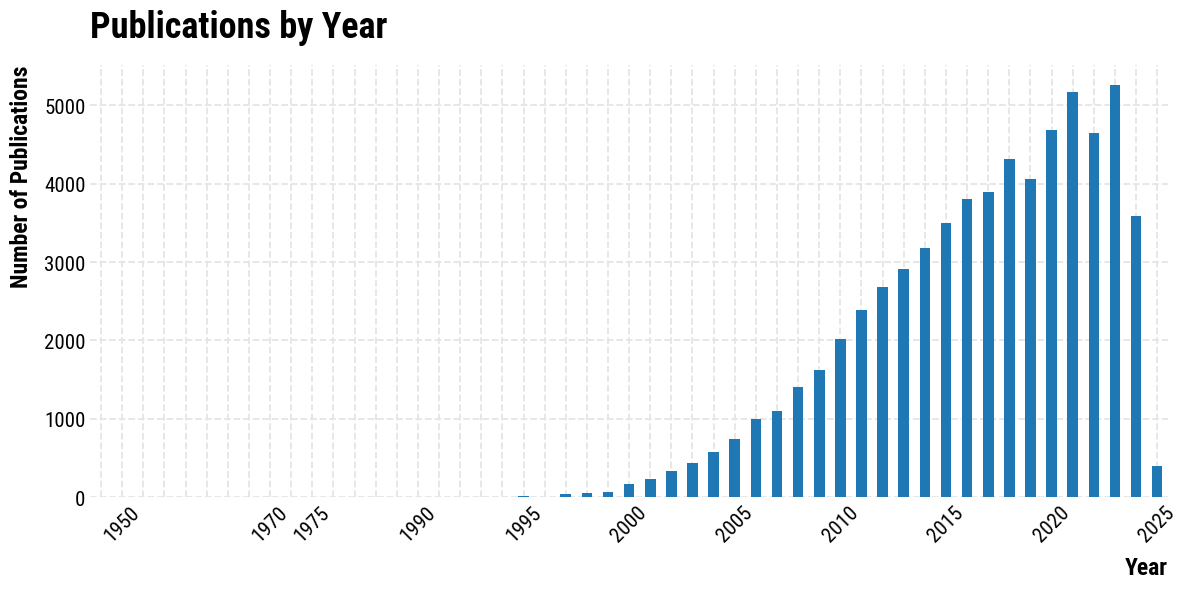

In [49]:
# Create bar graph of publication years
plt.figure(figsize=(12,6))

# Get value counts and sort by year
yearly_counts = data['publication_year'].value_counts().sort_index()

# Plot the bars
ax = yearly_counts.plot(kind='bar')

# Get current x-axis ticks
xticks = ax.get_xticks()
xlabels = [yearly_counts.index[int(i)] for i in xticks]

# Keep only labels for years divisible by 5
keep_labels = []
keep_ticks = []
for tick, label in zip(xticks, xlabels):
    if label % 5 == 0:  # Keep years divisible by 5
        keep_labels.append(str(int(label)))
        keep_ticks.append(tick)
    else:
        keep_labels.append('')
        keep_ticks.append(tick)

plt.xticks(keep_ticks, keep_labels, rotation=45)
plt.title('Publications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.tight_layout()
plt.show()


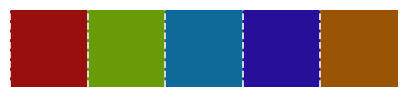

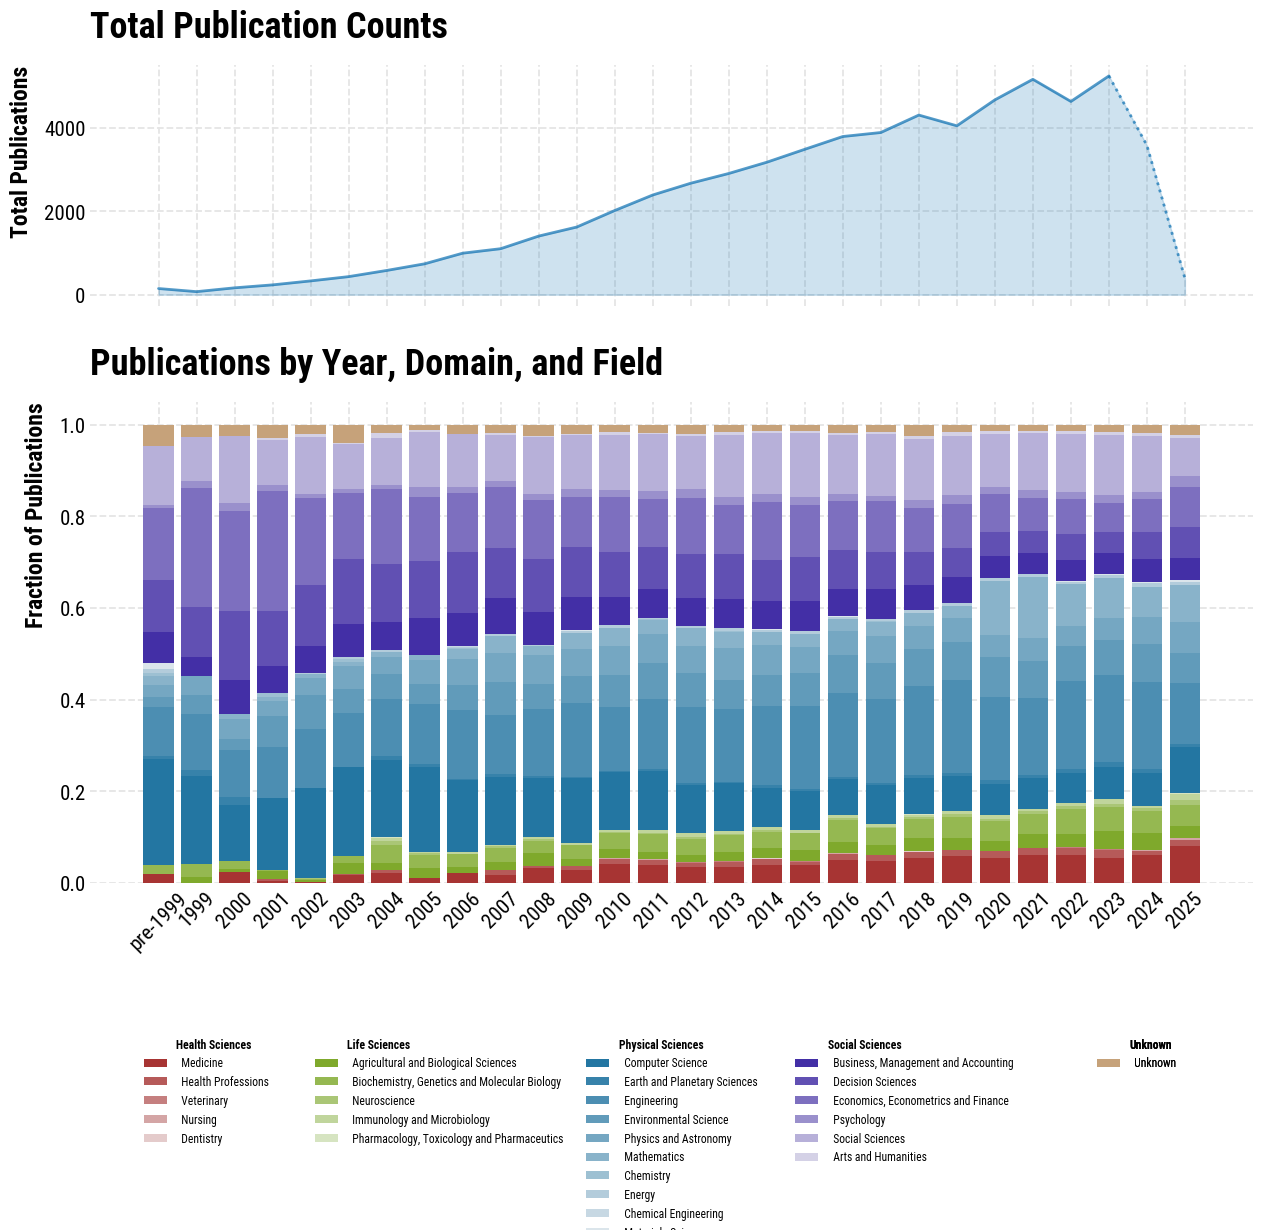

,year_group,domain,field,count
591,2025,Social Sciences,Psychology,9
592,2025,Social Sciences,Social Sciences,33
593,2025,Unknown,Unknown,9
594,pre-1999,Health Sciences,Medicine,3
595,pre-1999,Life Sciences,"Biochemistry, Genetics and Molecular Biology",3
596,pre-1999,Physical Sciences,Chemistry,1
597,pre-1999,Physical Sciences,Computer Science,34
598,pre-1999,Physical Sciences,Earth and Planetary Sciences,1
599,pre-1999,Physical Sciences,Energy,1
600,pre-1999,Physical Sciences,Engineering,16


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast  # Safely evaluate strings containing Python literals
import numpy as np
from matplotlib.patches import Patch

# 1. Parse the primary_topic JSON-like strings
def extract_domain_field(topic_str):
    try:
        topic_dict = ast.literal_eval(topic_str)
        domain = topic_dict.get('domain', {}).get('display_name', 'Unknown')
        field = topic_dict.get('field', {}).get('display_name', 'Unknown')
        return pd.Series({'domain': domain, 'field': field})
    except:
        return pd.Series({'domain': 'Unknown', 'field': 'Unknown'})


try:
    del data['domain']
    del data['field']
except:
    pass

domain_field_df = data['primary_topic'].apply(extract_domain_field)

data = pd.concat([data, domain_field_df], axis=1)

# Aggregate all papers before 1999 into "pre-1999"
data['year_group'] = data['publication_year'].apply(lambda x: "pre-1999" if x < 1999 else str(x))

# 3. Create year-domain-field counts
yearly_counts = data.groupby(['year_group', 'domain', 'field']).size().reset_index(name='count')

# 4. Define the ordered x-axis categories
def sort_key(x):
    return -1 if x == "pre-1999" else int(x)

publication_labels = sorted(yearly_counts['year_group'].unique(), key=sort_key)

# Compute totals per year_group for both normalization and top distribution
totals = yearly_counts.groupby('year_group')['count'].sum().to_dict()

# 5. Define domains and assign colors manually
domains = sorted([d for d in yearly_counts['domain'].unique() if d != "Unknown"])
# Add Unknown last if it exists in the data
if "Unknown" in yearly_counts['domain'].unique():
    domains.append("Unknown")
domain_colors = ['#980f0e', '#699a07', '#0f6a9a', '#270f99', '#995406']
sns.palplot(domain_colors)
domain_color_dict = dict(zip(domains, domain_colors))

# 6. Create a reversed color palette for fields within each domain (dark→light)
field_colors = {}
for domain in domains:
    domain_fields = yearly_counts[yearly_counts['domain'] == domain]['field'].unique()
    base_color = domain_color_dict[domain]
    palette = sns.light_palette(base_color, n_colors=len(domain_fields) + 2)[1:-1]
    reversed_palette = palette[::-1]
    for field, color in zip(domain_fields, reversed_palette):
        field_colors[(domain, field)] = color

###############################################################################
# Create 3 subplots (top=distribution, middle=stacked bars, bottom=legends)
###############################################################################
fig = plt.figure(figsize=(15, 15))

# We'll allocate slimmer space to the top "histogram" and more space to the middle.
# For example, top=1, middle=2, bottom=1
gs = fig.add_gridspec(3, 1, height_ratios=[1, 2, 1], hspace=0.3)

###############################################################################
# Top subplot: distribution-style plot with color #0e71b2
###############################################################################
ax_top = fig.add_subplot(gs[0])

x = np.arange(len(publication_labels))
counts_array = [totals[label] for label in publication_labels]

# Identify which indices correspond to years 2023 and later
future_years_mask = np.array([label in [ "2024", "2025"] for label in publication_labels])
regular_years_mask = ~future_years_mask

# Find the index for 2023 (last regular year)
try:
    last_regular_year_idx = np.where(np.array(publication_labels) == "2023")[0][0]
    has_2023 = True
except IndexError:
    has_2023 = False

# Fill between for the entire range
ax_top.fill_between(x, counts_array, color='#0e71b2', alpha=0.2)

# Plot regular years with solid line
ax_top.plot(x[regular_years_mask], np.array(counts_array)[regular_years_mask], 
            color='#0e71b2', alpha=0.7, linewidth=2)

# Plot future years (2023-2025) with dotted line
if np.any(future_years_mask):
    # Include the connection point (2022) if it exists
    future_x = x[future_years_mask]
    future_counts = np.array(counts_array)[future_years_mask]
    
    if has_2023:
        # Add 2022 as the starting point for the dotted line to ensure continuity
        future_x = np.insert(future_x, 0, last_regular_year_idx)
        future_counts = np.insert(future_counts, 0, counts_array[last_regular_year_idx])
    
    ax_top.plot(future_x, future_counts, color='#0e71b2', alpha=0.7, linewidth=2, 
                linestyle='dotted')

ax_top.set_ylabel('Total Publications')
ax_top.set_title('Total Publication Counts')
###############################################################################
# Middle subplot: share the x-axis with top, but middle will show labels
###############################################################################
ax_middle = fig.add_subplot(gs[1], sharex=ax_top)

# Force the top axis to hide x-axis ticks & labels
ax_top.tick_params(axis='x', which='both', labelbottom=False)
# (Optionally hide the top axis spine if desired)
# ax_top.spines['bottom'].set_visible(False)

# Stacked bars (normalized by year total)
bottom = pd.Series(0.0, index=publication_labels)
for domain in domains:
    domain_data = yearly_counts[yearly_counts['domain'] == domain]
    domain_fields = domain_data['field'].unique()
    for field in domain_fields:
        field_data = domain_data[domain_data['field'] == field]
        heights = pd.Series(0.0, index=publication_labels)
        for _, row in field_data.iterrows():
            ygrp = row['year_group']
            if totals[ygrp] != 0:
                heights[ygrp] = row['count'] / totals[ygrp]
        ax_middle.bar(
            x,
            heights[publication_labels].values,
            bottom=bottom[publication_labels].values,
            color=field_colors[(domain, field)],
            width=0.8
        )
        bottom += heights

ax_middle.set_ylabel('Fraction of Publications')
ax_middle.set_title('Publications by Year, Domain, and Field')
ax_middle.set_xticks(x)
ax_middle.set_xticklabels(publication_labels, rotation=45)

###############################################################################
# Bottom subplot: domain legends
###############################################################################
ax_bottom = fig.add_subplot(gs[2])
ax_bottom.set_xlim(0, 1)
ax_bottom.set_ylim(0, 1)
ax_bottom.set_xticks([])
ax_bottom.set_yticks([])
ax_bottom.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

n_domains = len(domains)
for i, domain in enumerate(domains):
    handles = []
    header_handle = Patch(facecolor='none', edgecolor='none', label=domain)
    handles.append(header_handle)
    
    domain_fields = yearly_counts[yearly_counts['domain'] == domain]['field'].unique()
    for field in domain_fields:
        patch = Patch(facecolor=field_colors[(domain, field)], label="  " + field)
        handles.append(patch)
    
    x_anchor = (i + 0.5) / n_domains
    legend = ax_bottom.legend(
        handles=handles,
        loc='upper center',
        bbox_to_anchor=(x_anchor, 0.8),
        ncol=1,
        frameon=False,
        fontsize='small'
    )
    legend.get_texts()[0].set_fontweight("bold")
    ax_bottom.add_artist(legend)

# Save as SVG
plt.savefig("graphics/my_plot.svg", format="svg")
plt.show()

display(yearly_counts.tail(20))

# Plotting the map
This code plots the interdisciplinary map of agent-based models onto a base map of base data from the OpenAlex-mapper project.


In [55]:
basedata_df = pd.read_pickle(
    '/Users/Noich001/Desktop/science_basemap/gradio_app_dev/100k_filtered_OA_sample_cluster_and_positions_supervised.pkl'
)


In [56]:
import time
import datamapplot
import numpy as np

print("Starting PNG generation...")

# Sample and prepare data
sample_prep_start = time.time()
sample_to_plot = basedata_df#.sample(20000)
labels1 = np.array(sample_to_plot['cluster_2_labels'])
labels2 = np.array(['Unlabelled' if pd.isna(x) else x for x in sample_to_plot['parsed_field']])

ratio = 0.6
mask = np.random.random(size=len(labels1)) < ratio
combined_labels = np.where(mask, labels1, labels2)

# Get the 30 most common labels
unique_labels, counts = np.unique(combined_labels, return_counts=True)
top_30_labels = set(unique_labels[np.argsort(counts)[-100:]])

# Replace less common labels with 'Unlabelled'
combined_labels = np.array(['Unlabelled' if label not in top_30_labels else label for label in combined_labels])
#combined_labels = np.array(['Unlabelled'  for label in combined_labels])
#if label not in top_30_labels else label
colors_base = ['#536878' for _ in range(len(labels1))]
print(f"Sample preparation completed in {time.time() - sample_prep_start:.2f} seconds")

# Create main plot
print(labels1)
print(labels2)
print(sample_to_plot[['x','y']].values)
print(combined_labels)

main_plot_start = time.time()
fig, ax = datamapplot.create_plot(
    sample_to_plot[['x','y']].values,
    combined_labels,
    label_wrap_width=12,
    label_over_points=True,
    dynamic_label_size=True,
    use_medoids=True, # Switch back once efficient mediod caclulation comes out!
    point_size=2,
    marker_color_array=colors_base,
    force_matplotlib=True,
    max_font_size=12,
    min_font_size=4,
    min_font_weight=100,
    max_font_weight=300,
    font_family="Roboto Condensed",
    color_label_text=False, add_glow=False,
    highlight_labels=list(np.unique(labels1)),
    label_font_size=8,
    highlight_label_keywords={"fontsize": 12, "fontweight": "bold", "bbox":{"boxstyle":"circle", "pad":0.75,'alpha':0.}},
)
print(f"Main plot creation completed in {time.time() - main_plot_start:.2f} seconds")

if len(data) > 50_000:
    point_size = .2
elif len(data) > 10_000:
    point_size = 1
else:
    point_size = 5
    

scatter = plt.scatter(
    data['x'],
    data['y'],
    c=data['approximate_publication_year'],
    cmap=colormaps.haline,
    alpha=0.8,
    s=point_size,
    vmin=2000,
    vmax=2025,
)
plt.colorbar(scatter, shrink=0.5, format='%d')

# Save plot
plt.axis('off')
plt.savefig('graphics/manual_distribution_umap_plot.png', dpi=300, bbox_inches='tight')
plt.close()
plt.show()


Starting PNG generation...
Sample preparation completed in 0.11 seconds
['Computer Science' 'Medicine' 'Social Sciences' ... 'Geosciences'
 'Social Sciences' 'Medicine']
['Biomedical Engineering' 'Surgery' 'Social Psychology' ...
 'Water Science and Technology' 'Molecular Biology'
 'Radiology, Nuclear Medicine and Imaging']
[[ 4.801728    0.11863032]
 [ 5.669323   12.182262  ]
 [12.041371    3.342695  ]
 ...
 [ 2.464296    3.0383081 ]
 [ 9.99265     4.732254  ]
 [ 6.6992116  12.127818  ]]
['Biomedical Engineering' 'Medicine' 'Social Sciences' ... 'Geosciences'
 'Molecular Biology' 'Medicine']


  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment
Main plot creation completed in 5.90 seconds
